In [1]:
from qutip import *
from tqdm import tqdm
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from eigenfns import *
from arch import *

In [3]:
#Gate fidelity Runs
class gate:
    #fn for gate operation    
    def __init__(self,tarch):
        self.tarch = tarch
        self.id = tarch.id
        self.na = tarch.na
        self.a = tarch.a
        
    def x_i(self,i=0):
        #x on a specific transmon
        Neye = []
        N = self.tarch.N
        Nlevel = self.tarch.Nlevel
        for i in  range(N):
            Neye.append(qeye(Nlevel))
        
        x_temp  = basis(Nlevel,0)*basis(Nlevel,1).dag()+basis(Nlevel,1)*basis(Nlevel,0).dag()
        Neye[i] = x_temp
        
        return tensor(Neye)
        
    def x_all(self):
        #apply X over all qubits
        Neye = []
        N = self.tarch.N
        Nlevel = self.tarch.Nlevel
        x_temp  = basis(Nlevel,0)*basis(Nlevel,1).dag()+basis(Nlevel,1)*basis(Nlevel,0).dag()
        for i in  range(N):
            Neye.append(x_temp)
        
        return tensor(Neye)
    
    def id_all(self):
        return self.id
    
    '''
    def position_gate(self):
        gate = []
        for ai in self.a:
            gate.append((ai + ai.dag())/2)
        return tensor(gate)
    '''

In [5]:
'''
def fidelity_cal(eta,U,states):
    #eta = G*exp(iHt)
    #U is gate operator in T = 0
    #op = U.dag()*eta*U
    op = U.dag()*eta
    #op = U.dag()*U*exp(iHt)
    ex = 0
    for state in states:
        ex = ex + abs(expect(op,state))
    
    ex = ex/len(states)
    return ex
'''

'\ndef fidelity_cal(eta,U,states):\n    #eta = G*exp(iHt)\n    #U is gate operator in T = 0\n    #op = U.dag()*eta*U\n    op = U.dag()*eta\n    #op = U.dag()*U*exp(iHt)\n    ex = 0\n    for state in states:\n        ex = ex + abs(expect(op,state))\n    \n    ex = ex/len(states)\n    return ex\n'

In [4]:
def fidelity_cal(UT,gate_0,states):
    gate_t = UT.dag()*gate_0*UT
    op = gate_t*gate_0.dag()
    ex = 0
    for state in states:
        ex = ex + abs(expect(op,state))
    
    ex = ex/len(states)
    #print("fidelity = " + str(ex))
    return ex

def fidelity_thermal(UT,gate_0,states,evals,Temp = 1,kb = 1):
    gate_t = UT.dag()*gate_0*UT
    op = gate_t*gate_0
    #op = U.dag()*U*exp(iHt)
    ex = 0
    z = 0
    for state,e in zip(states,evals):
        z = z + math.exp(-e/(kb*Temp))
        ex = ex + abs(expect(op,state))*math.exp(-e/(kb*Temp))
    
    ex = ex/z
    #print("fidelity = " + str(ex))
    return ex

def fidelity_otoc(UT,gate_0,states):
    gate_t = UT.dag()*gate_0*UT
    op = gate_t*gate_0 - gate_0*gate_t
    ex = 0
    for state in states:
        ex = ex + abs(expect(op,state))
    
    ex = ex/len(states)
    #print("fidelity = " + str(ex))
    return ex

In [8]:
T = 1.0
tarch = transmon_arch(5,4)

gate_0 = gate(tarch).x_all() #gate operator at t = 0
H3 = tarch.H_int(T)
H = tarch.H_const + H3
states = cstates(tarch.H_const,tarch.na) #states to calculate gate on

In [ ]:
states

In [9]:
delt_list = np.linspace(0,10,100) #time of evolution
f_arr = []#array for fidelity of set fo states at each time
f_arr2 = []
f_arr3 = []
for delt in tqdm(delt_list):
    UT = (-1j*delt*H).expm() #exp(iHt)
    f_arr.append(abs(fidelity_cal(UT,gate_0,states[1])))
    #f_arr2.append(abs(fidelity_otoc(UT,gate_0,states[1])))
    #f_arr3.append(abs(fidelity_thermal(UT,gate_0,states[1],states[0], Temp = 30)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:09<00:00,  1.89s/it]


Text(0, 0.5, 'fidelity')

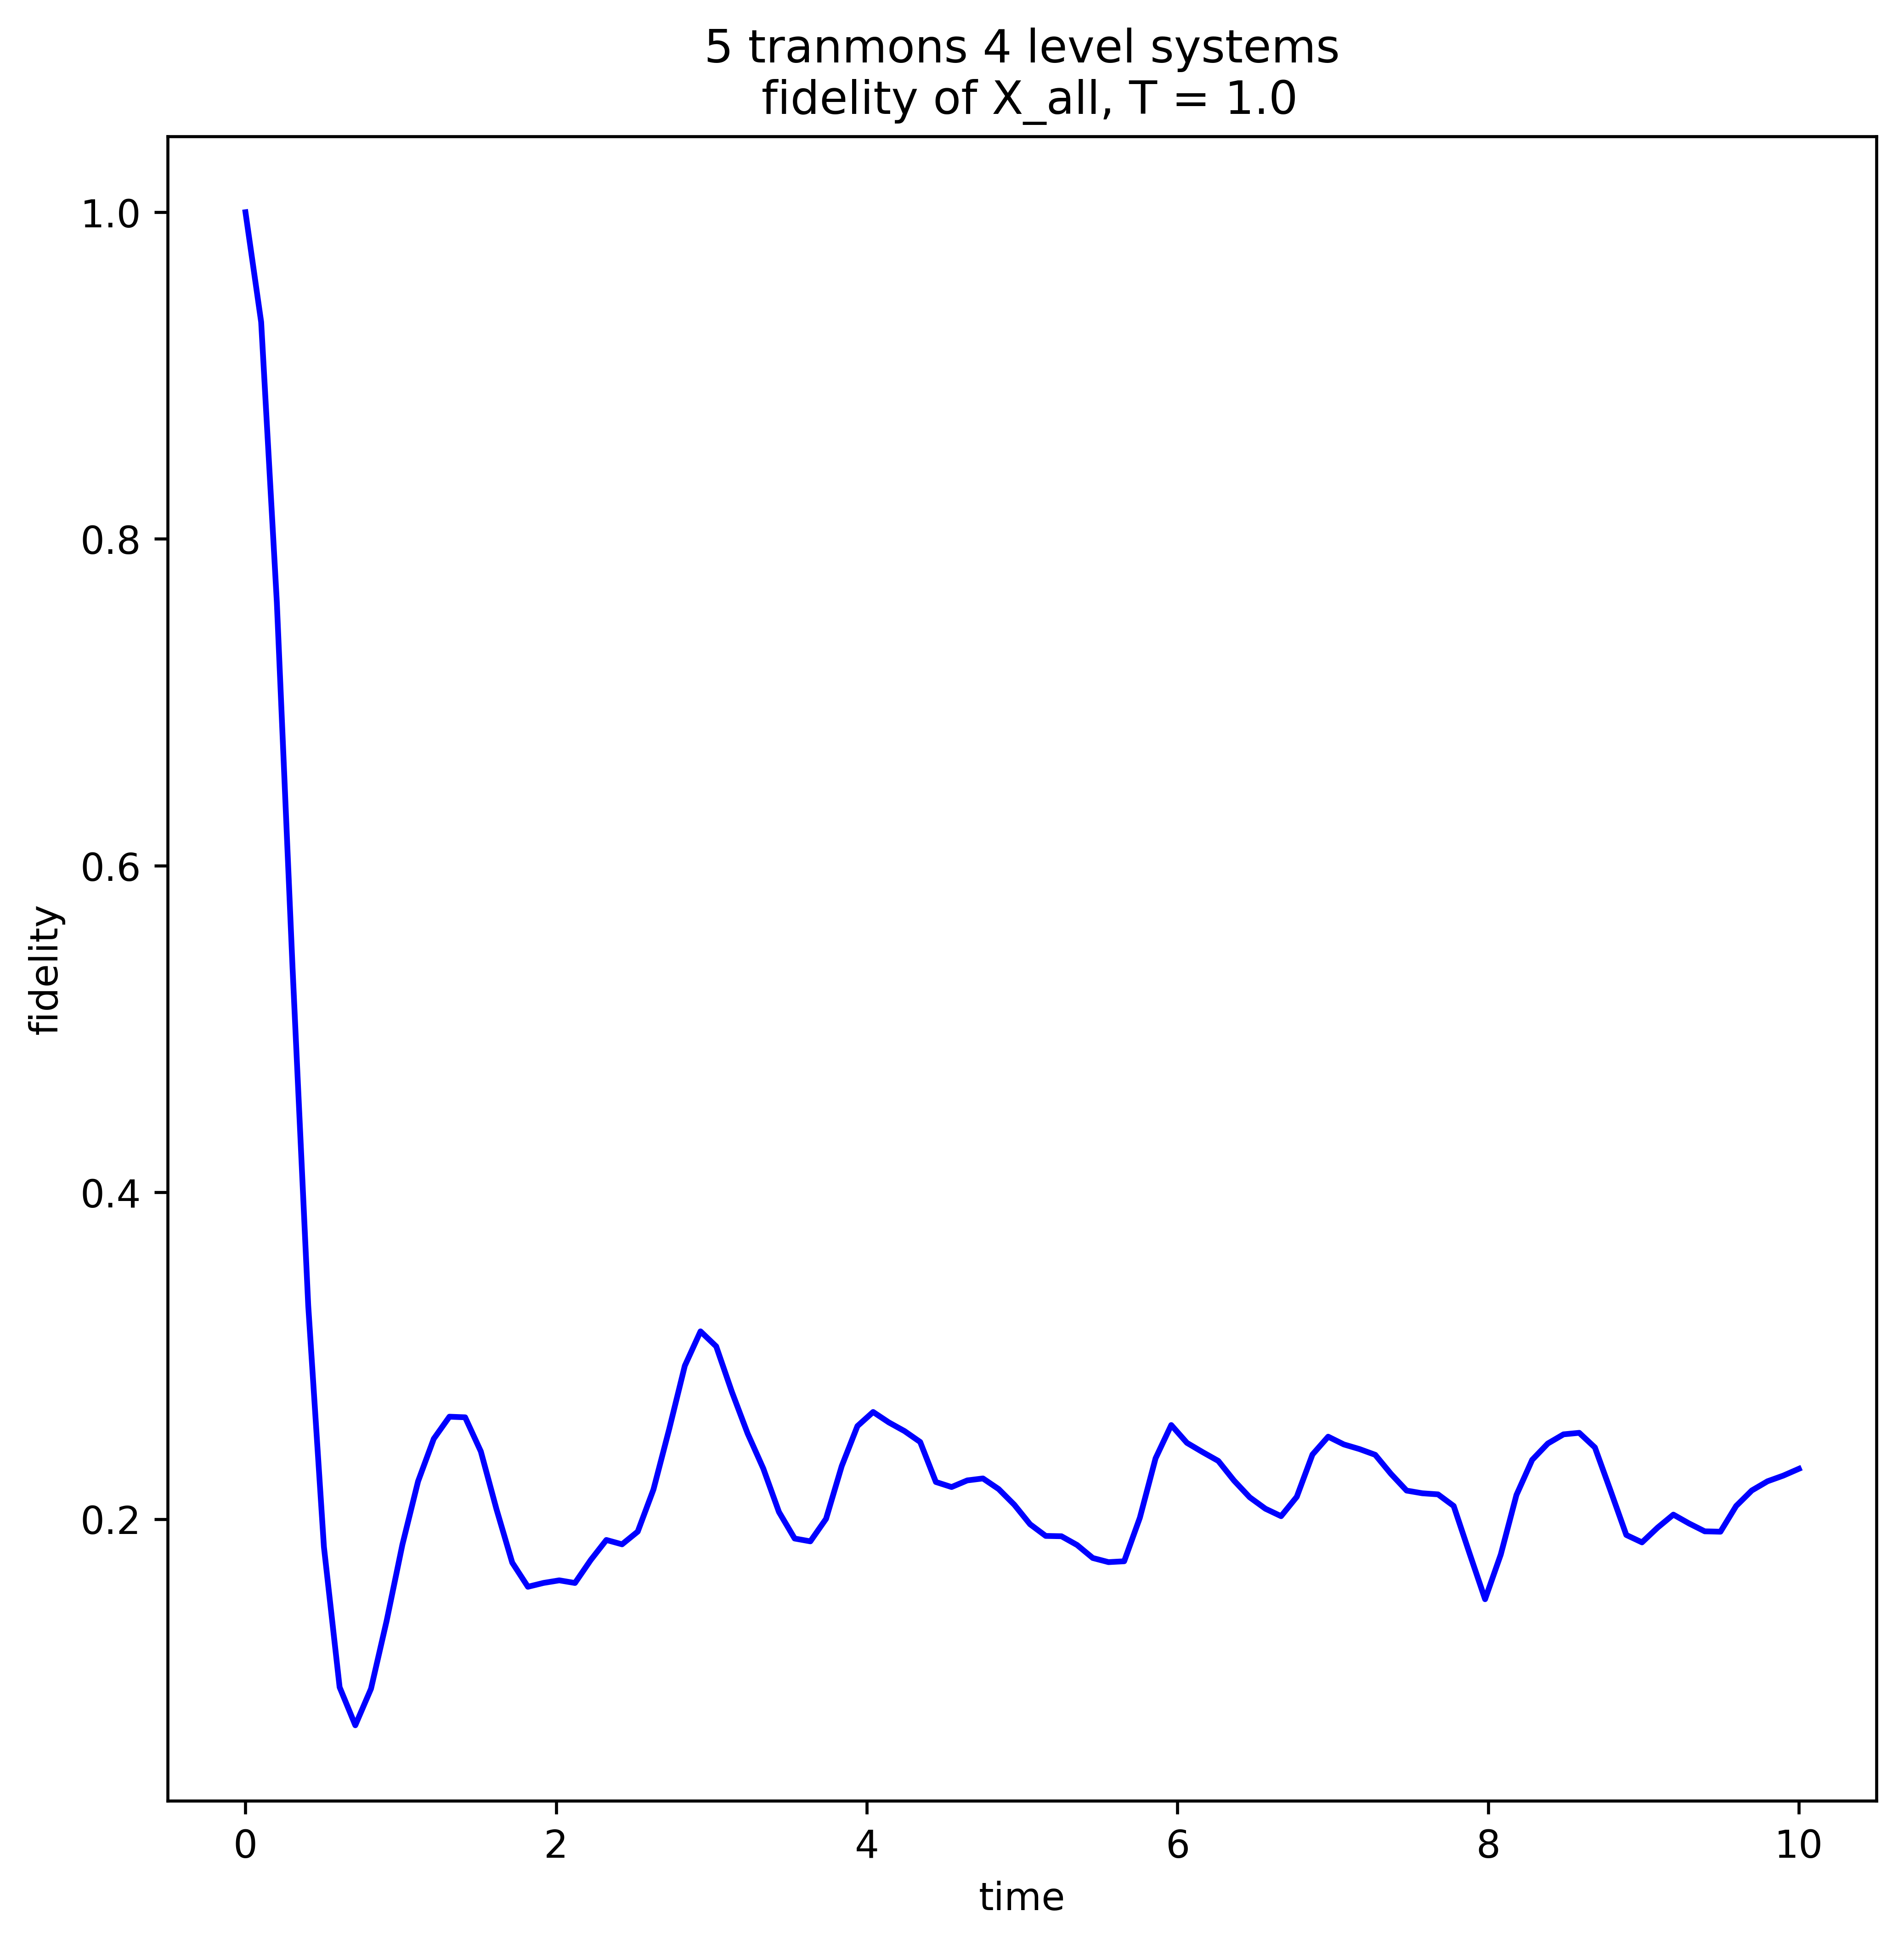

In [10]:
plt.figure(figsize=(8,8))
plt.plot(delt_list,f_arr,c = "blue")
#plt.plot(delt_list,f_arr2, c = "red")
#plt.plot(delt_list,np.log(f_arr2), c = "orange")
#plt.scatter(range(len(overlap)),overlap,s = 0.5)
title_temp = str(str(tarch.N) + " tranmons " + str(tarch.Nlevel)+ " level systems")
plt.title(str(title_temp)+"\n fidelity of X_all, T = "+str(T))
plt.xlabel("time")
plt.ylabel("fidelity")
#plt.legend(["x(t)x(0)","c(t) = |<[x(t),x(0)]>|", "log(c(t))"], loc ="upper right")